In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
df=pd.read_csv("F:/Project/University_Project/Dataset/Crop/WestBengal_Crop.csv") 

In [11]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,West Bengal,24 PARAGANAS NORTH,2009,AUTUMN,Rice,18746.0,42098.0
1,West Bengal,24 PARAGANAS NORTH,2009,KHARIF,Cotton(lint),162.0,985.0
2,West Bengal,24 PARAGANAS NORTH,2009,KHARIF,Dry ginger,277.0,489.0
3,West Bengal,24 PARAGANAS NORTH,2009,KHARIF,Jute,50888.0,888510.0
4,West Bengal,24 PARAGANAS NORTH,2009,KHARIF,Mesta,542.0,5404.0


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34158 entries, 0 to 34157
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     34158 non-null  object 
 1   District_Name  34158 non-null  object 
 2   Crop_Year      34158 non-null  int64  
 3   Season         34158 non-null  object 
 4   Crop           34158 non-null  object 
 5   Area           34158 non-null  float64
 6   Production     34098 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [268]:
df.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       60
dtype: int64

In [269]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [270]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

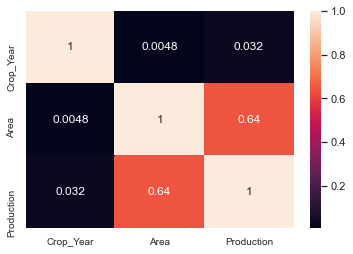

In [271]:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True);

In [272]:
df.District_Name.nunique()

18

In [273]:
df.District_Name.unique()

array(['24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'BANKURA', 'BARDHAMAN',
       'BIRBHUM', 'COOCHBEHAR', 'DARJEELING', 'DINAJPUR DAKSHIN',
       'DINAJPUR UTTAR', 'HOOGHLY', 'HOWRAH', 'JALPAIGURI', 'MALDAH',
       'MEDINIPUR EAST', 'MEDINIPUR WEST', 'MURSHIDABAD', 'NADIA',
       'PURULIA'], dtype=object)

In [274]:
df.District_Name.value_counts()

JALPAIGURI            2382
PURULIA               2340
MEDINIPUR WEST        2280
DARJEELING            2184
DINAJPUR UTTAR        2142
MURSHIDABAD           2118
BANKURA               2112
NADIA                 2094
COOCHBEHAR            2088
BARDHAMAN             2082
MALDAH                2046
BIRBHUM               1986
24 PARAGANAS NORTH    1626
24 PARAGANAS SOUTH    1506
HOOGHLY               1458
HOWRAH                1260
DINAJPUR DAKSHIN      1200
MEDINIPUR EAST        1194
Name: District_Name, dtype: int64

In [275]:
print(df.Season.nunique())
print(df.Season.unique())
print(df.Season.max())
print(df.Season.value_counts())

6
['AUTUMN' 'KHARIF' 'RABI' 'SUMMER' 'ANNUAL' 'WINTER']
WINTER
RABI      12690
KHARIF     8160
SUMMER     4644
ANNUAL     4194
AUTUMN     2772
WINTER     1638
Name: Season, dtype: int64


In [276]:
print(df.Crop.nunique())
print(df.Crop.unique())
print(df.Crop.max())
print(df.Crop.value_counts().head(20))

41
['Rice' 'Cotton(lint)' 'Dry ginger' 'Jute' 'Mesta' 'Sunflower' 'Urad'
 'Arhar/Tur' 'Gram' 'Khesari' 'Linseed' 'Masoor' 'Peas & beans (Pulses)'
 'Rapeseed &Mustard' 'Wheat' 'Moong(Green Gram)' 'Dry chillies'
 'Groundnut' 'Potato' 'Sesamum' 'Sugarcane' 'Turmeric' 'Maize' 'Arecanut'
 'Garlic' 'Safflower' 'Barley' 'Bajra' 'Jowar' 'Niger seed'
 'Other Kharif pulses' 'Ragi' 'Small millets' 'Soyabean' 'Horse-gram'
 'Sannhamp' 'Tobacco' 'Other  Rabi pulses' 'Cardamom' 'Castor seed' 'Moth']
Wheat
Rice                     3564
Moong(Green Gram)        2262
Maize                    2202
Groundnut                2106
Sesamum                  2094
Urad                     1728
Potato                   1224
Rapeseed &Mustard        1188
Wheat                    1182
Masoor                   1122
Jute                     1116
Khesari                  1044
Sunflower                1038
Sugarcane                1014
Peas & beans (Pulses)    1008
Linseed                   900
Gram                    

In [277]:
Prod = df.groupby(by = df.District_Name)['Production','District_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
Prod

,District_Name,Production
15,MURSHIDABAD,284672532.0
9,HOOGHLY,257796660.0
14,MEDINIPUR WEST,255674514.0
3,BARDHAMAN,241156368.0
16,NADIA,206721564.0
5,COOCHBEHAR,147076998.0
0,24 PARAGANAS NORTH,131567736.0
8,DINAJPUR UTTAR,120764676.0
2,BANKURA,120111060.0
11,JALPAIGURI,119505972.0


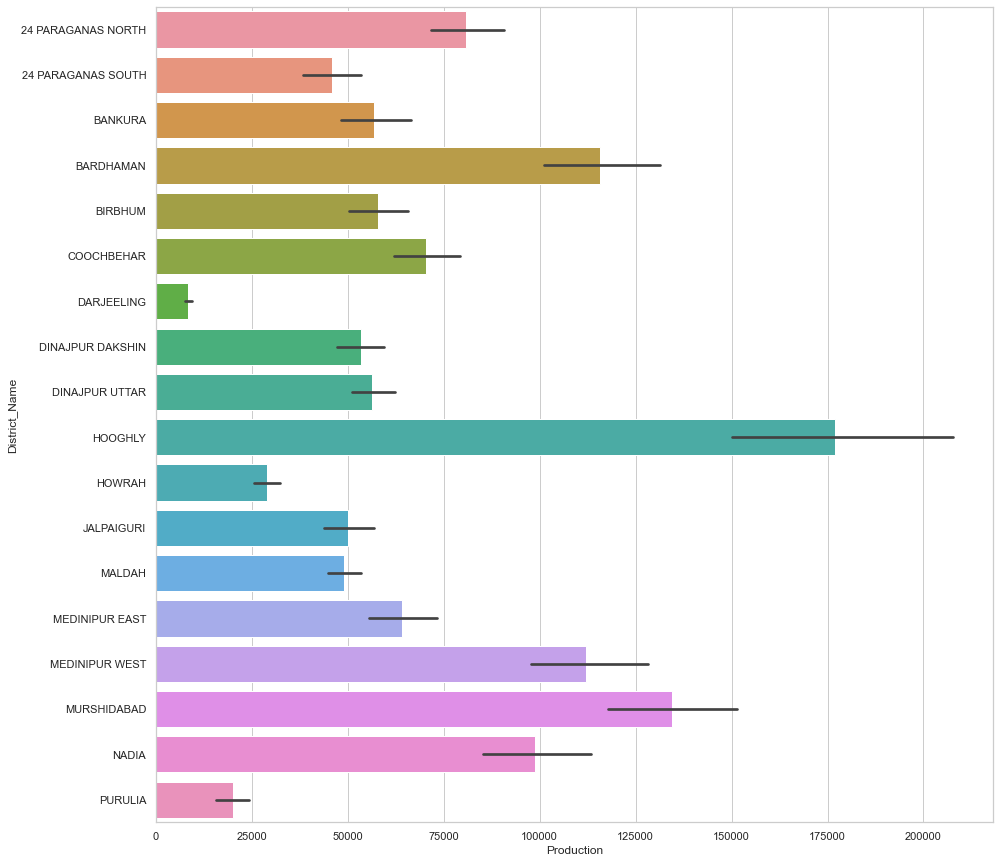

In [278]:
plt.figure(figsize= (15,15))
sns.barplot(x=df['Production'],y= df["District_Name"], orient='h');


In [279]:
#Zone-Wise Production - 1997-2014
north_bengal = ['COOCHBEHAR', 'DARJEELING', 'DINAJPUR DAKSHIN', 'DINAJPUR UTTAR', 'JALPAIGURI', 'MALDAH']
south_bengal = ['24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'BANKURA', 'BARDHAMAN','BIRBHUM','HOOGHLY','HOWRAH','MEDINIPUR EAST', 'MEDINIPUR WEST','NADIA',
       'PURULIA','MURSHIDABAD']

In [280]:
def get_zonal_names(row):
    if row['District_Name'].strip() in north_bengal:
        val = 'North Bengal'
    elif row['District_Name'].strip()  in south_bengal:
        val = 'South Bengal'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['South Bengal', 'North Bengal'], dtype=object)

In [281]:
df.Zones.value_counts()

South Bengal    22056
North Bengal    12042
Name: Zones, dtype: int64

In [282]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

In [283]:
df["cat_crop"].value_counts()

Cereal        8394
oilseeds      6126
Pulses        5850
fibres        2652
Nuts          2520
Vegetables    2268
spices        1752
Commercial    1356
Beans          918
Name: cat_crop, dtype: int64

In [284]:
data_explore = df.copy()

Text(0.5, 1.0, 'Zone-Wise Production: Total')

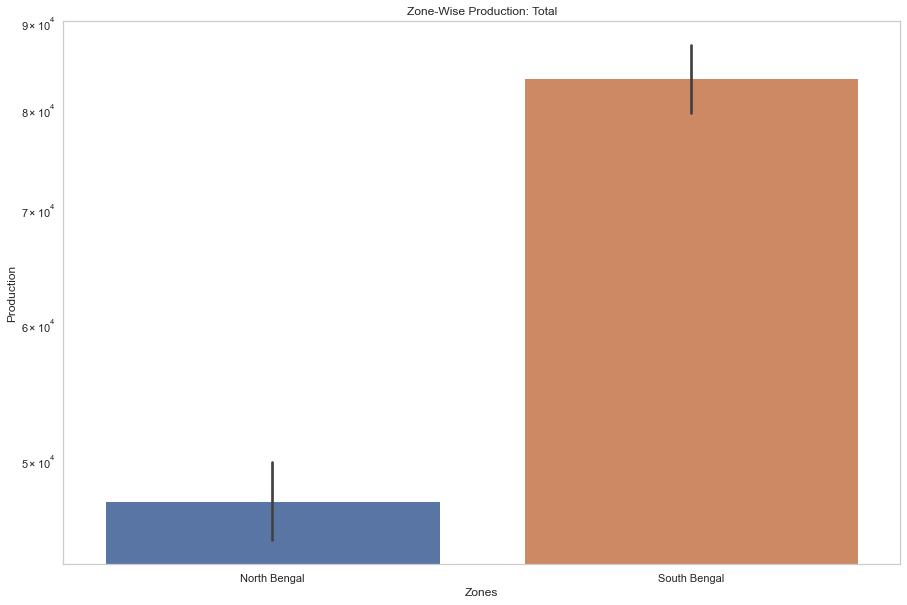

In [356]:
fig, ax = plt.subplots(figsize=(15,10))
#sns.set_theme(style="whitegrid")
sns.barplot(data_explore.Zones.sort_values(ascending=True), data_explore.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

Text(0.5, 1.0, 'Southern-Zone Production')

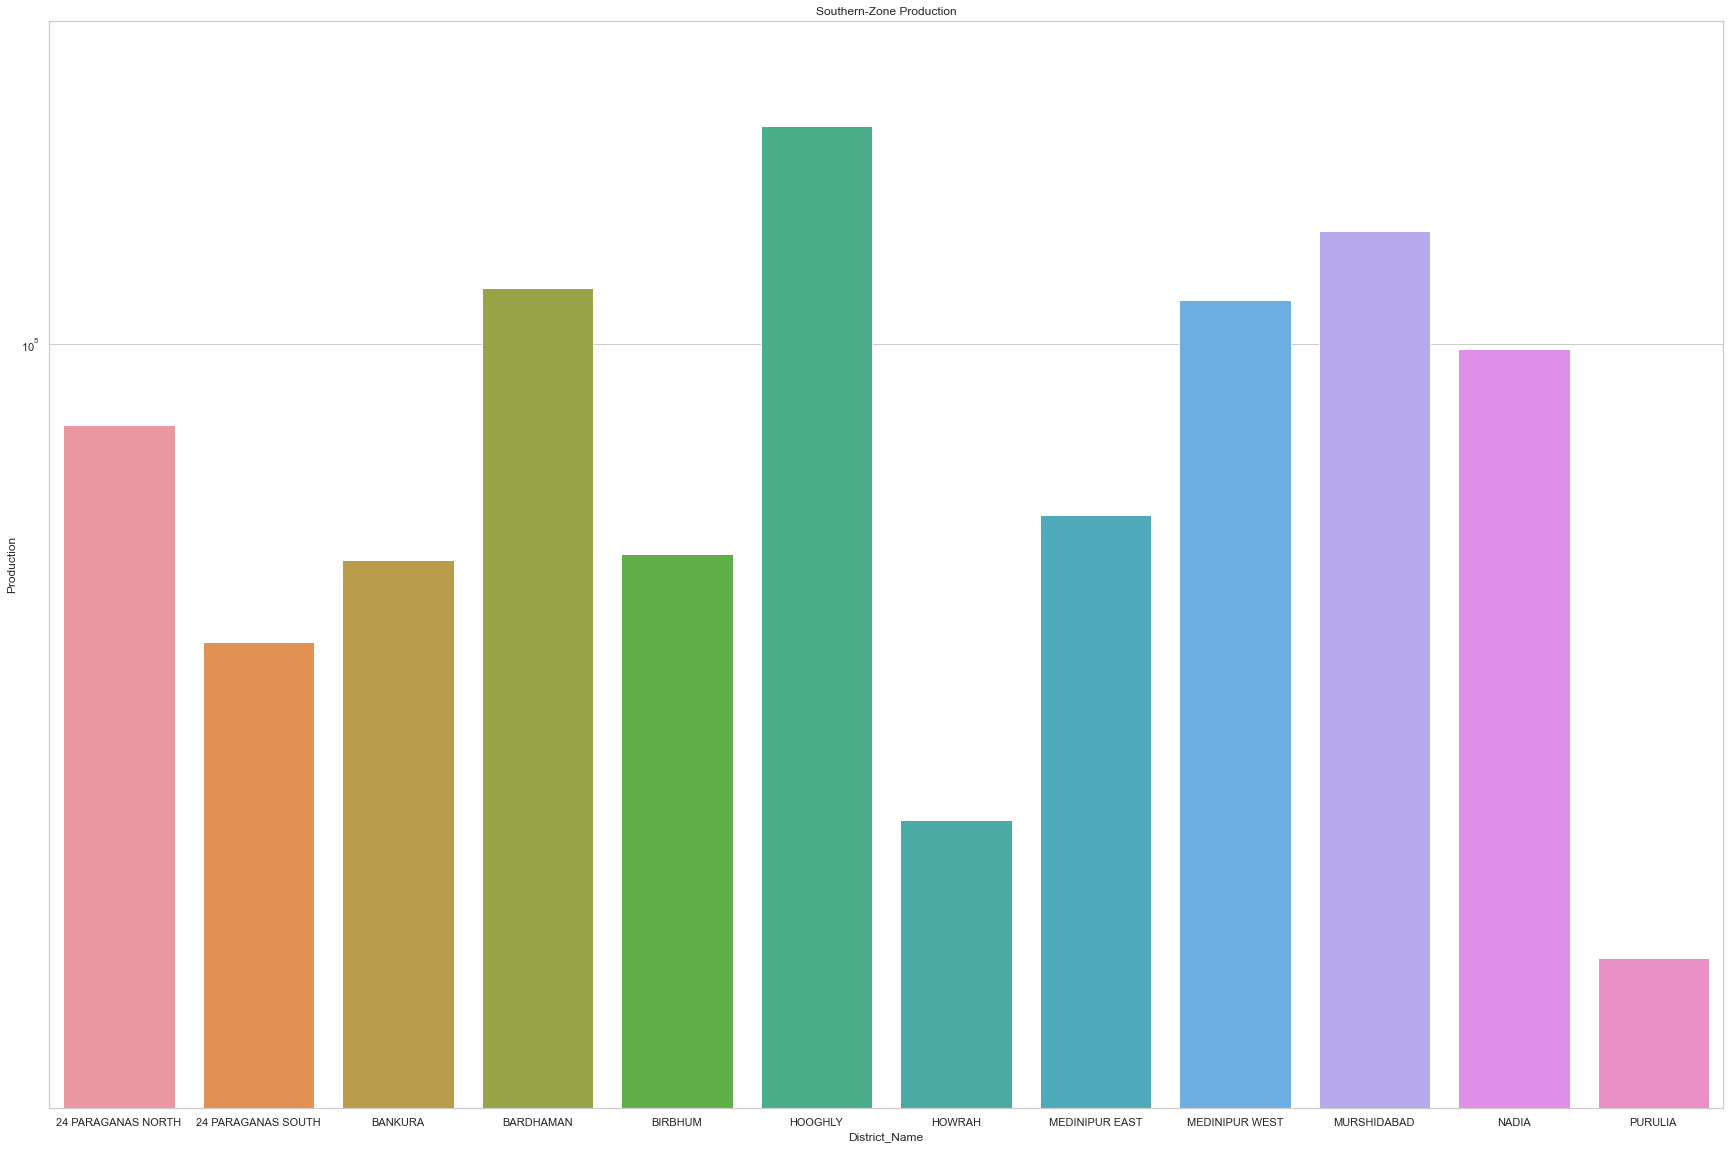

In [355]:
south_zone =  data_explore[(data_explore["Zones"] == 'South Bengal')]
fig, ax = plt.subplots(figsize=(30,20))
#sns.set_theme(style="whitegrid")
sns.barplot(south_zone.District_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

<AxesSubplot:xlabel='Crop_Year'>

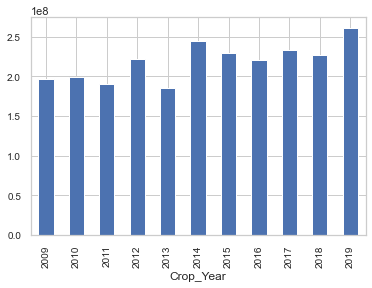

In [287]:
plt.tick_params(labelsize=10)
data_explore.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

Text(0.5, 1.0, 'Seasonal Crops vs Production')

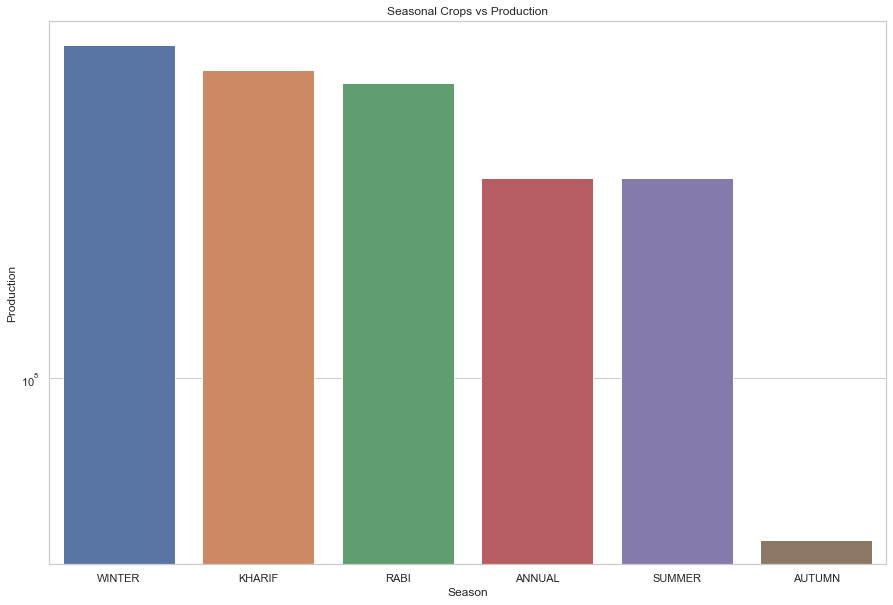

In [354]:
#Season vs Production
df_season=data_explore.copy()
season = df_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15,10))
#sns.set_theme(style="whitegrid")
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

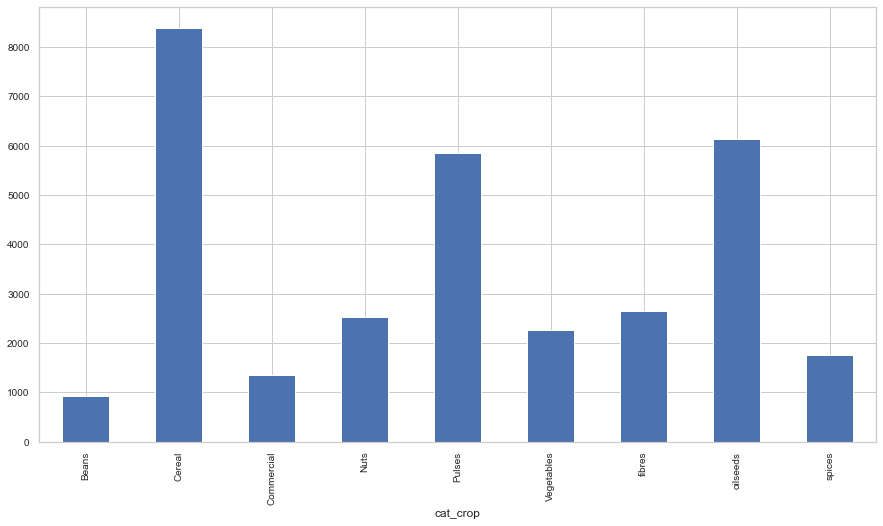

In [289]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_explore.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

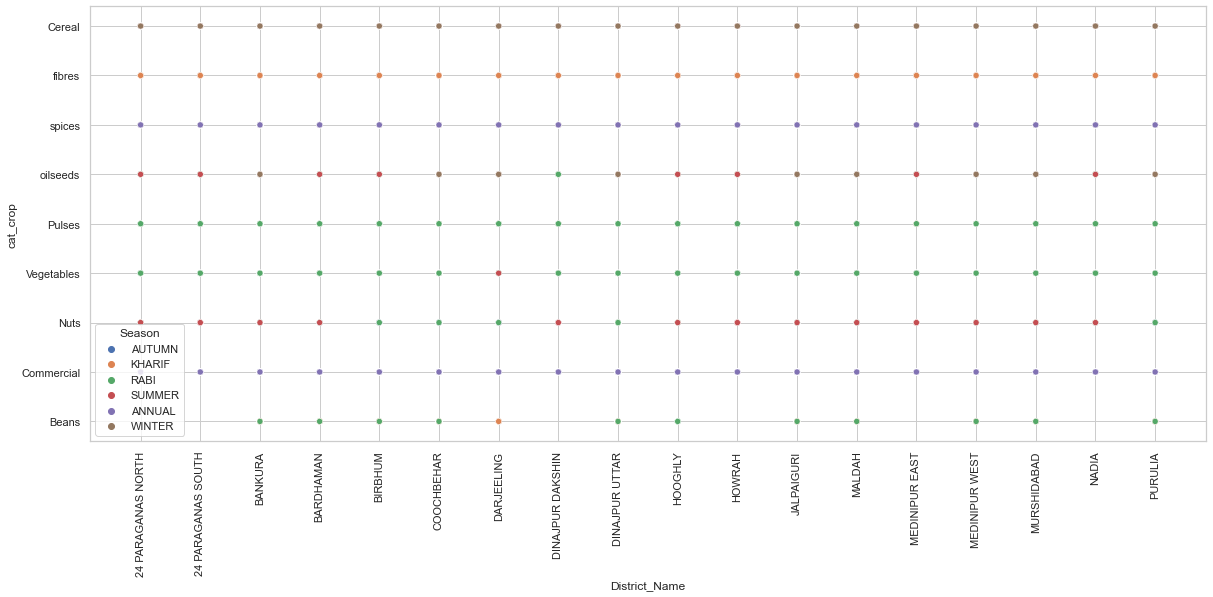

In [290]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data_explore,x="District_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

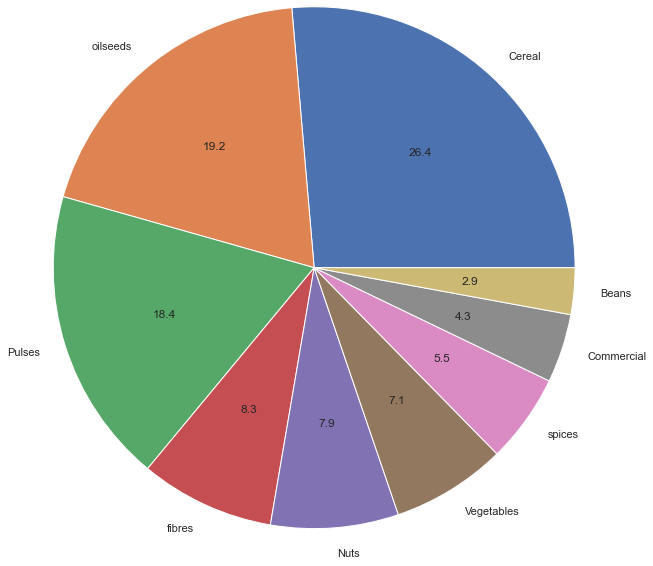

In [291]:
df1=data_explore["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

In [292]:
df_2 = pd.crosstab(data_explore['District_Name'], data_explore['cat_crop'])
df_2

cat_crop,Beans,Cereal,Commercial,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
District_Name,,,,,,,,,
24 PARAGANAS NORTH,0,372,66,120,300,132,180,294,96
24 PARAGANAS SOUTH,0,348,66,84,318,132,144,252,96
BANKURA,96,534,108,186,336,84,168,378,96
BARDHAMAN,120,390,66,186,384,132,222,324,96
BIRBHUM,132,450,66,144,414,132,150,336,96
COOCHBEHAR,66,576,102,162,270,132,198,372,96
DARJEELING,114,606,48,126,348,168,66,396,120
DINAJPUR DAKSHIN,0,336,6,66,228,114,132,210,96
DINAJPUR UTTAR,60,606,54,108,390,120,132,468,96


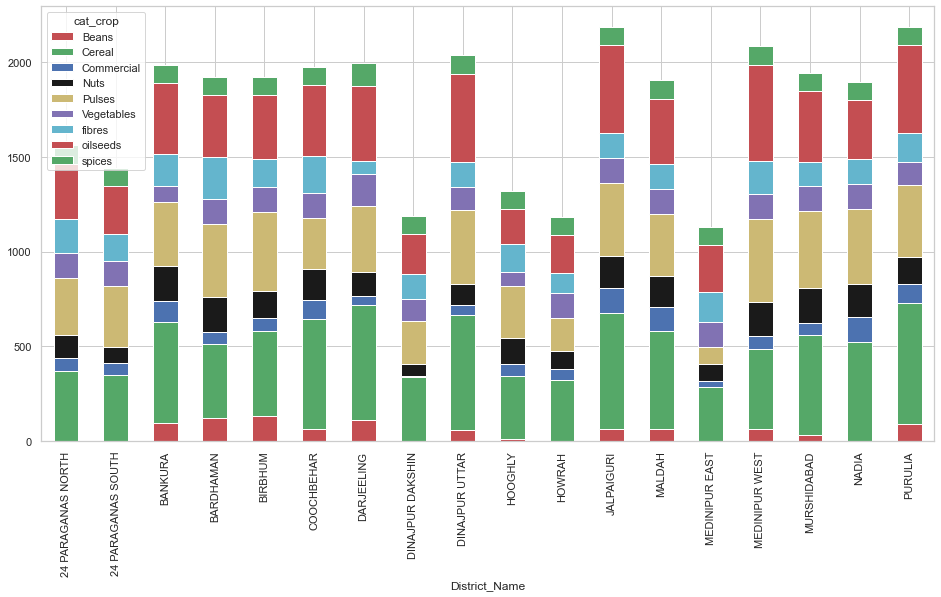

In [293]:
my_colors = 'rgbkymc' 
df_2.plot(kind='bar', stacked=True, figsize = (16,8), color=my_colors);

Text(0.5, 1.0, 'Overall Crops vs Production')

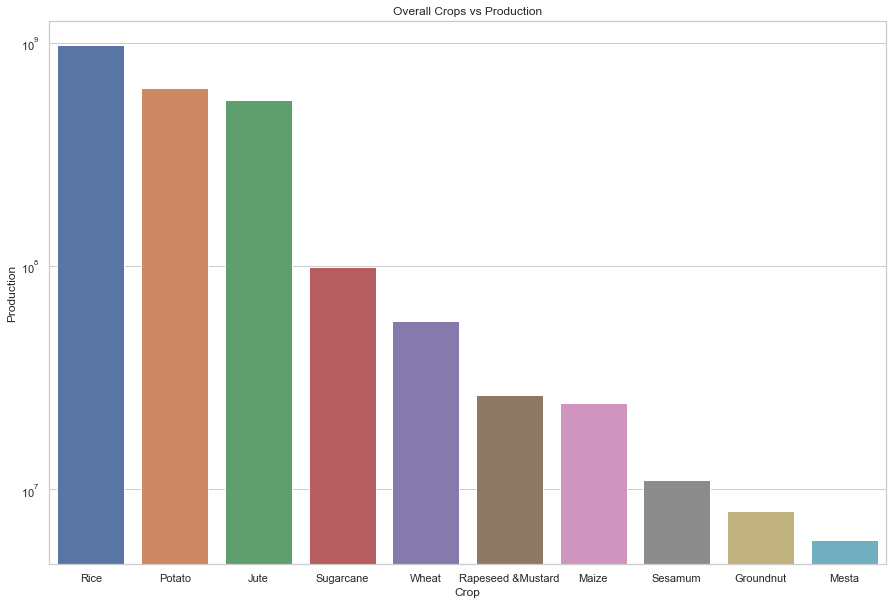

In [353]:
#Overall Crop Production
crop = data_explore.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
#sns.set_theme(style="whitegrid")
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

In [295]:
data_explore["Crop"].value_counts()[:5]

Rice                 3564
Moong(Green Gram)    2262
Maize                2202
Groundnut            2106
Sesamum              2094
Name: Crop, dtype: int64

In [296]:
rice_df = data_explore[data_explore["Crop"]=="Rice"]

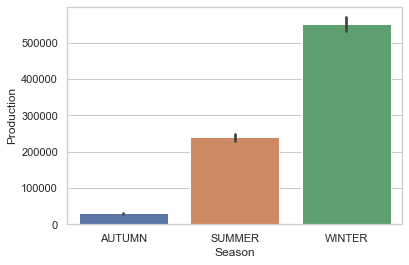

In [352]:
#sns.set_theme(style="whitegrid")
sns.barplot("Season","Production",data=rice_df);

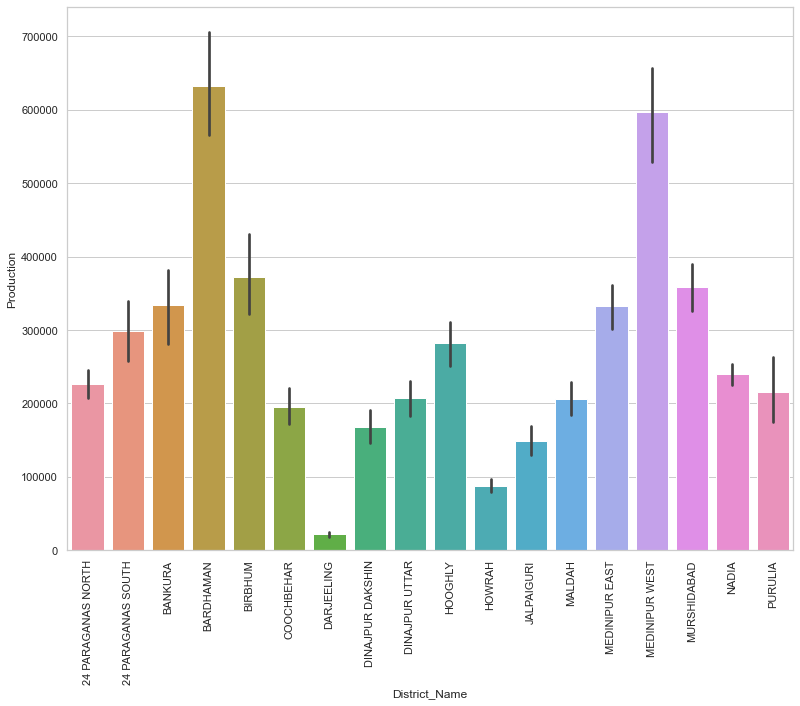

In [351]:
plt.figure(figsize=(13,10))
#sns.set_theme(style="whitegrid")
sns.barplot("District_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [299]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:10]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:10]

,District_Name,Production,precent_of_pro
3,BARDHAMAN,125189022.0,12.841080
14,MEDINIPUR WEST,118210098.0,12.125227
4,BIRBHUM,73754268.0,7.565236
15,MURSHIDABAD,70926846.0,7.275217
2,BANKURA,66026598.0,6.772581
13,MEDINIPUR EAST,65739888.0,6.743172
1,24 PARAGANAS SOUTH,59181822.0,6.070488
9,HOOGHLY,55853352.0,5.729076
16,NADIA,47398470.0,4.861828
0,24 PARAGANAS NORTH,44852466.0,4.600676


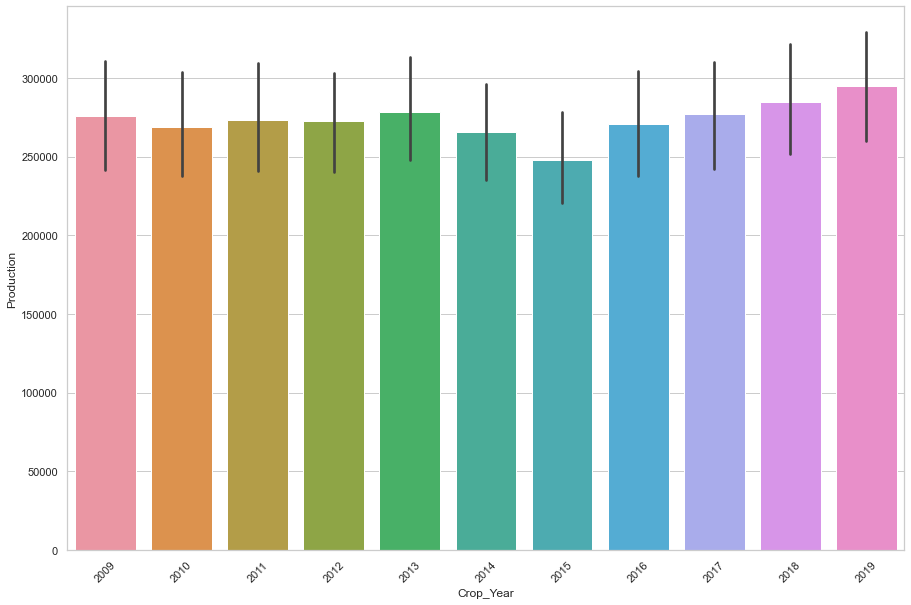

In [349]:
plt.figure(figsize=(15,10))
#sns.set_theme(style="whitegrid")
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("F:/Project/University_Project/Dataset/Crop/data2.csv") 

In [4]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production_N
0,West Bengal,DARJEELING,2011,KHARIF,Maize,14558.0,30808.0,14557.999
1,West Bengal,DINAJPUR UTTAR,2012,SUMMER,Maize,3501.0,22757.0,3500.999
2,West Bengal,DINAJPUR UTTAR,2018,ANNUAL,Sugarcane,13.0,1331.0,12.999
3,West Bengal,24 PARAGANAS SOUTH,2016,KHARIF,Sunflower,4787.0,5270.0,4786.999
4,West Bengal,DARJEELING,2011,KHARIF,Moong(Green Gram),50.0,23.0,49.999
...,...,...,...,...,...,...,...,...
34093,West Bengal,NADIA,2015,RABI,Gram,6147.0,5241.0,5.241
34094,West Bengal,HOWRAH,2016,SUMMER,Rice,40966.0,130799.0,130.799
34095,West Bengal,DARJEELING,2014,KHARIF,Niger seed,40.0,25.0,0.025
34096,West Bengal,MALDAH,2012,SUMMER,Groundnut,679.0,547.0,0.547


In [5]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
Production_N     0
dtype: int64

In [6]:
df['Crop'].unique()

array(['Maize', 'Sugarcane', 'Sunflower', 'Moong(Green Gram)', 'Sesamum',
       'Rapeseed &Mustard', 'Barley', 'Rice', 'Turmeric', 'Urad',
       'Groundnut', 'Small millets', 'Garlic', 'Jute', 'Masoor',
       'Soyabean', 'Dry chillies', 'Linseed', 'Jowar', 'Mesta', 'Khesari',
       'Gram', 'Potato', 'Horse-gram', 'Peas & beans (Pulses)',
       'Sannhamp', 'Other Kharif pulses', 'Safflower', 'Dry ginger',
       'Bajra', 'Other  Rabi pulses', 'Cotton(lint)', 'Tobacco',
       'Niger seed', 'Arhar/Tur', 'Castor seed', 'Arecanut', 'Ragi',
       'Wheat', 'Cardamom', 'Moth'], dtype=object)

In [7]:
 
s=input("Enter The District Name: ") 
s1=input("Enter The Season Name: ")
    
df = df.loc[(df['District_Name'] == s) & (df['Season'] == s1)] 
df

features = df[['Crop_Year','Area','Production_N']]
target = df['Crop']
labels = df['Crop']

# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.25,random_state =3)


from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)


from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

Enter The District Name: HOWRAH
Enter The Season Name: WINTER
DecisionTrees's Accuracy is:  100.0
Naive Bayes's Accuracy is:  100.0
RF's Accuracy is:  100.0


In [8]:
y = int(input("Enter the Year: "))
a = float(input("Enter the Area: "))
p = float(input("Enter the Production (divided by 1000): "))
data = np.array([[y,a,p]])
prediction = DecisionTree.predict(data)
print("PREFERABLE CROP : "+prediction)

Enter the Year: 2022
Enter the Area: 451
Enter the Production (divided by 1000): 23
['PREFERABLE CROP : Rice']
